# Task 2: Quantitative Analysis Using TA-Lib, pandas_ta, and PyNance

In [70]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import talib
import pandas_ta as pta
from pathlib import Path

In [71]:
# Define directories
BASE_DIR = Path.cwd().parent
PLOTS_DIR = BASE_DIR / "plots"
os.makedirs(PLOTS_DIR, exist_ok=True)

In [72]:
def save_and_show_plot(filename):
    """Helper function to save plots and display them"""
    plt.tight_layout()
    
    # Save plot to file
    plt.savefig(PLOTS_DIR / filename)
    print(f"Saved plot: {filename}")
    
    # Display plot
    plt.show()

In [73]:
# Load all stock price CSVs
csv_folder = r"C:\Users\jilow\OneDrive\Documents\FIndata\yfinance_data"
csv_files = glob.glob(os.path.join(csv_folder, "*_historical_data.csv"))
dfs = {}
for file in csv_files:
    ticker = os.path.basename(file).split("_")[0]
    df = pd.read_csv(file, parse_dates=['Date'], index_col='Date')
    dfs[ticker] = df

In [74]:
# Dictionary to hold DataFrames
dfs = {}
for file in csv_files:
    ticker = os.path.basename(file).split("_")[0]
    df = pd.read_csv(file, parse_dates=['Date'], index_col='Date')
    dfs[ticker] = df
print("Loaded tickers:", list(dfs.keys()))

Loaded tickers: ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA', 'TSLA']


In [75]:
# compute indicators
for ticker, df in dfs.items():
    try:
        # TA-Lib indicators
        df['SMA20'] = talib.SMA(df['Close'], timeperiod=20)
        df['RSI14'] = talib.RSI(df['Close'], timeperiod=14)
        macd, signal, hist = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
        df['MACD'] = macd
        df['MACD_Signal'] = signal
        df['MACD_Hist'] = hist

        # pandas_ta Volatility (stdev)
        df['Volatility20'] = pta.stdev(df['Close'], length=20)

        # Returns
        df['Daily_Return'] = df['Close'].pct_change()
        
        # Additional useful metrics
        df['EMA50'] = talib.EMA(df['Close'], timeperiod=50)
        df['ATR14'] = talib.ATR(df['High'], df['Low'], df['Close'], timeperiod=14)
        
        print(f"Processed indicators for {ticker}")
    except Exception as e:
        print(f"Error processing {ticker}: {str(e)}")
    
    dfs[ticker] = df


Processed indicators for AAPL
Processed indicators for AMZN
Processed indicators for GOOG
Processed indicators for META
Processed indicators for MSFT
Processed indicators for NVDA
Processed indicators for TSLA


Saved plot: AAPL_close_sma20.png


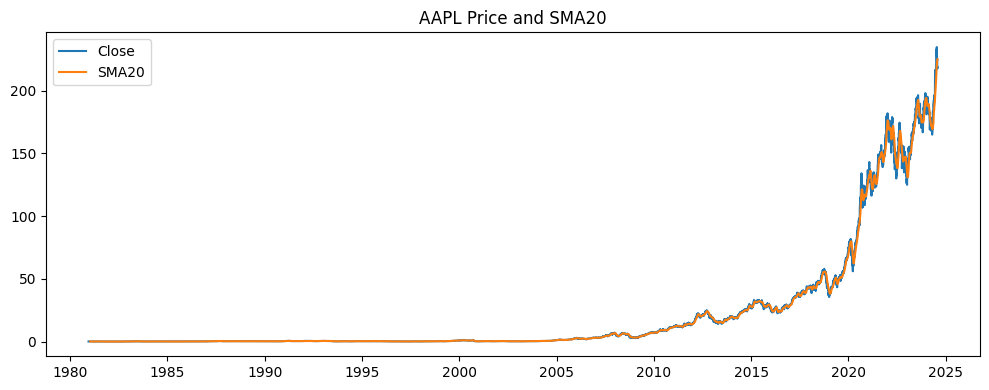

Saved plot: AMZN_close_sma20.png


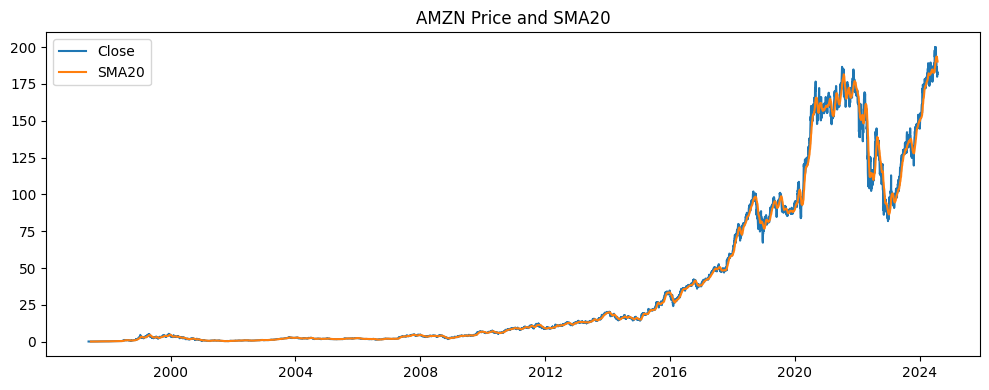

Saved plot: GOOG_close_sma20.png


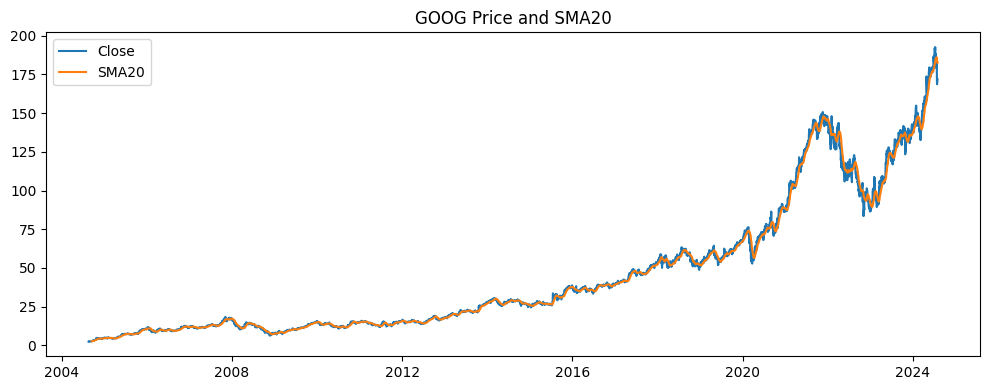

Saved plot: META_close_sma20.png


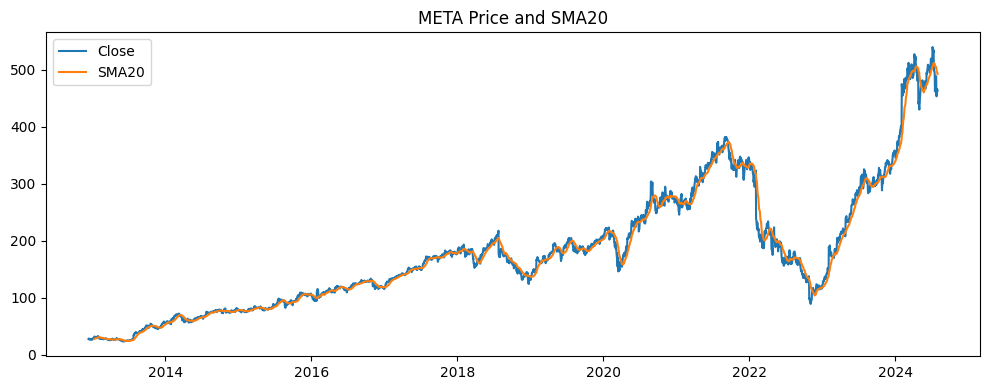

Saved plot: MSFT_close_sma20.png


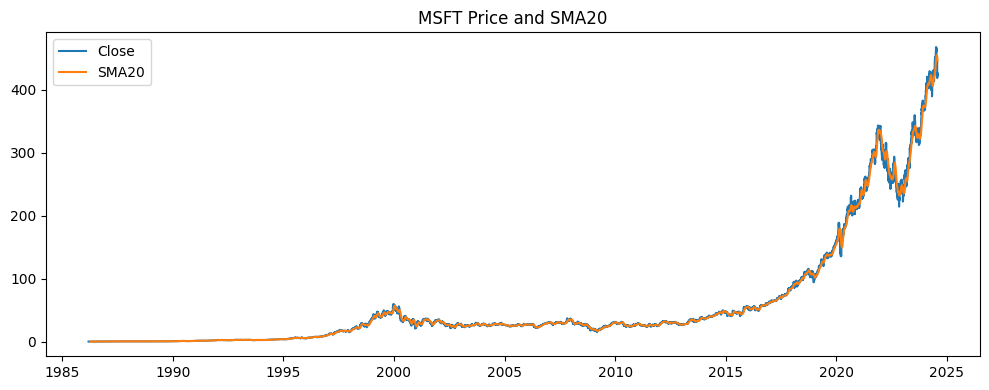

Saved plot: NVDA_close_sma20.png


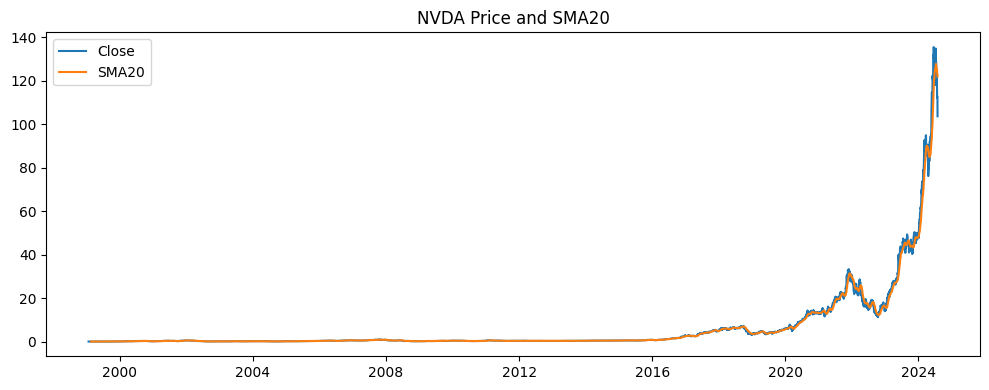

Saved plot: TSLA_close_sma20.png


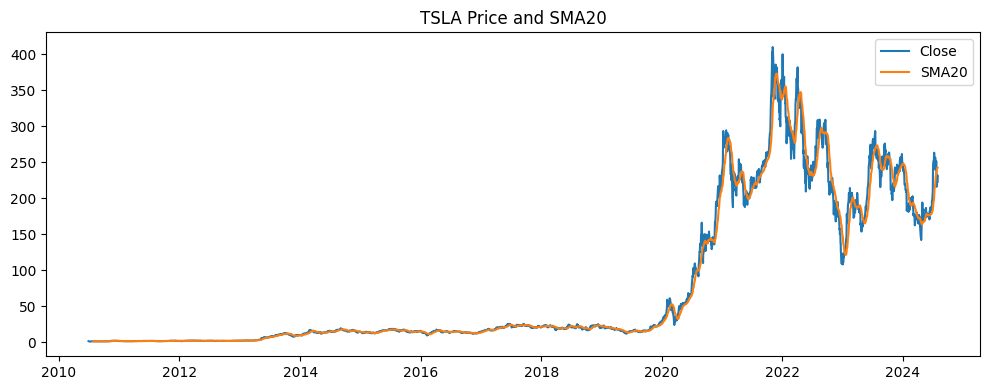

In [76]:
# Step 3: Plotting and saving results
for ticker, df in dfs.items():
    # Plot Close + SMA
    plt.figure(figsize=(10,4))
    plt.plot(df['Close'], label='Close')
    plt.plot(df['SMA20'], label='SMA20')
    plt.title(f"{ticker} Price and SMA20")
    plt.legend()
    plt.tight_layout()
    save_and_show_plot(f"{ticker}_close_sma20.png")

Saved plot: AAPL_rsi.png


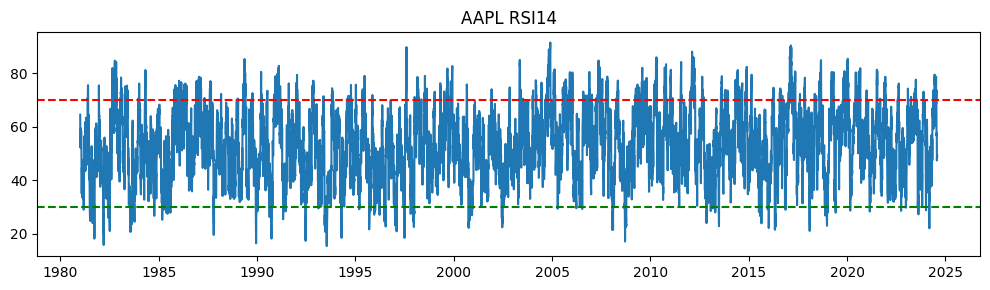

Saved plot: AMZN_rsi.png


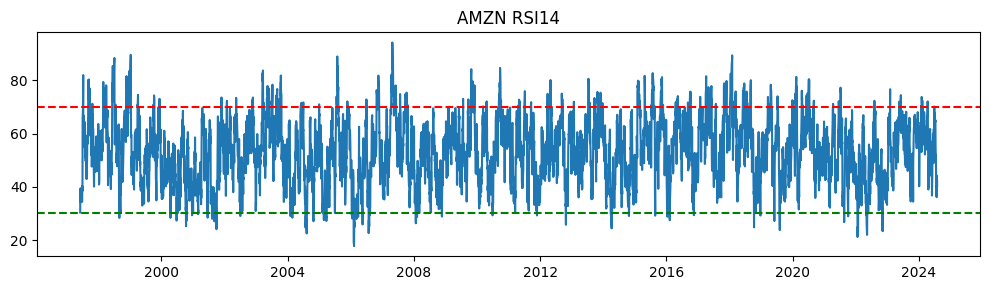

Saved plot: GOOG_rsi.png


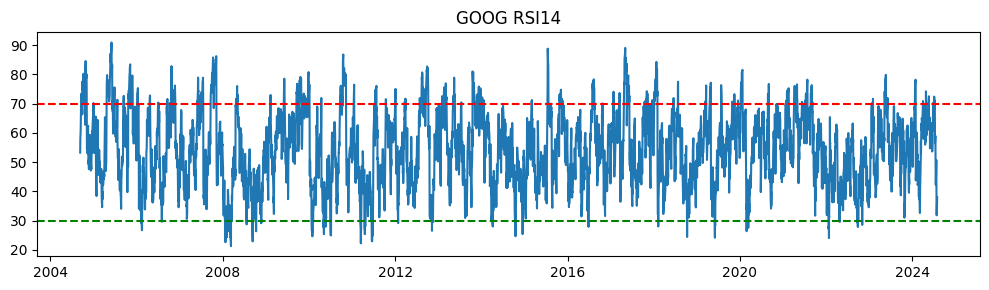

Saved plot: META_rsi.png


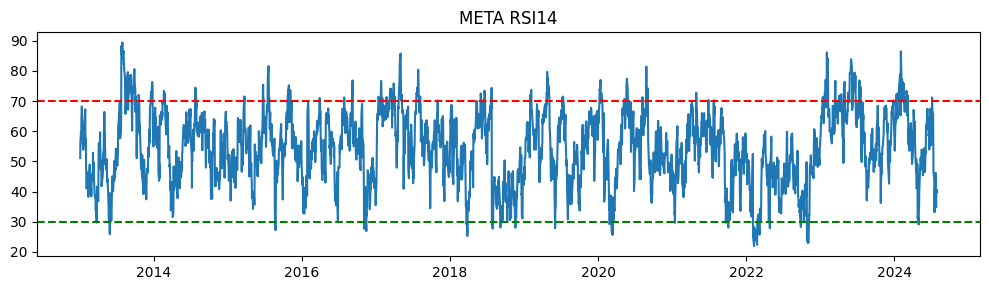

Saved plot: MSFT_rsi.png


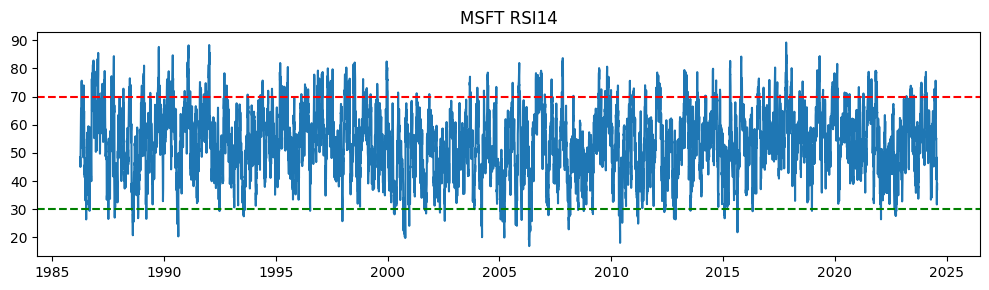

Saved plot: NVDA_rsi.png


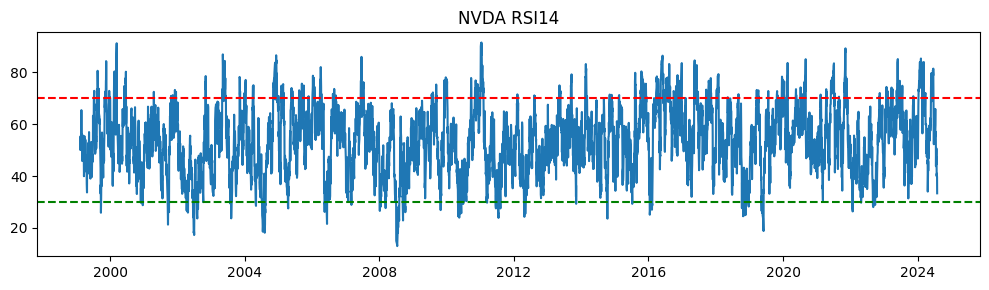

Saved plot: TSLA_rsi.png


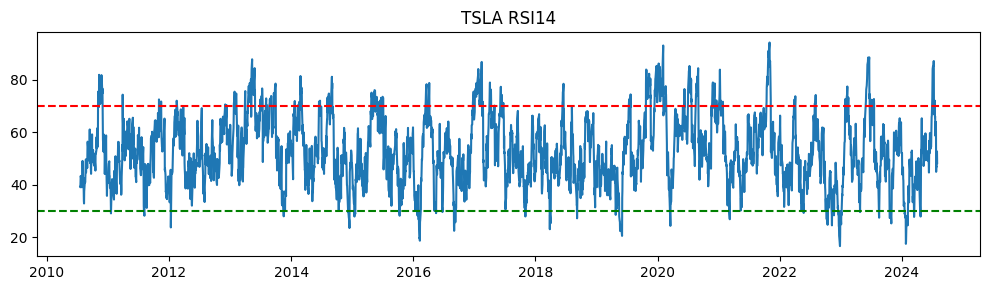

In [77]:
for ticker, df in dfs.items():
    # Plot RSI
    plt.figure(figsize=(10,3))
    plt.plot(df['RSI14'], label='RSI14')
    plt.axhline(70, linestyle='--', color='red')
    plt.axhline(30, linestyle='--', color='green')
    plt.title(f"{ticker} RSI14")
    plt.tight_layout()
    save_and_show_plot(f"{ticker}_rsi.png")

Saved plot: AAPL_macd.png


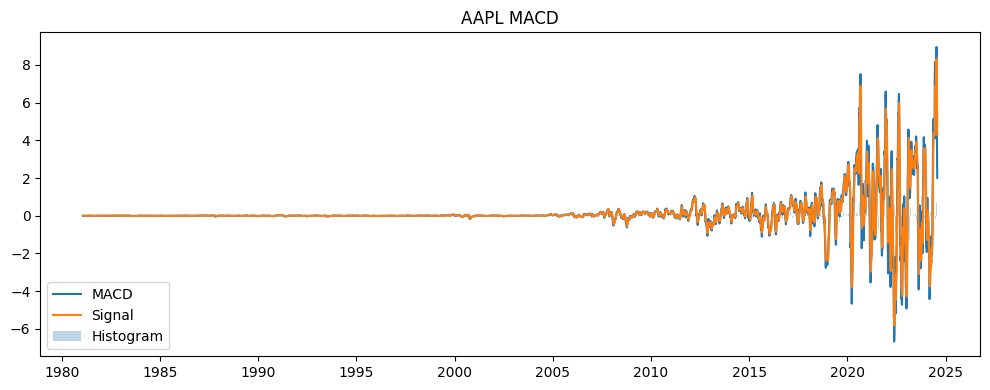

Saved plot: AMZN_macd.png


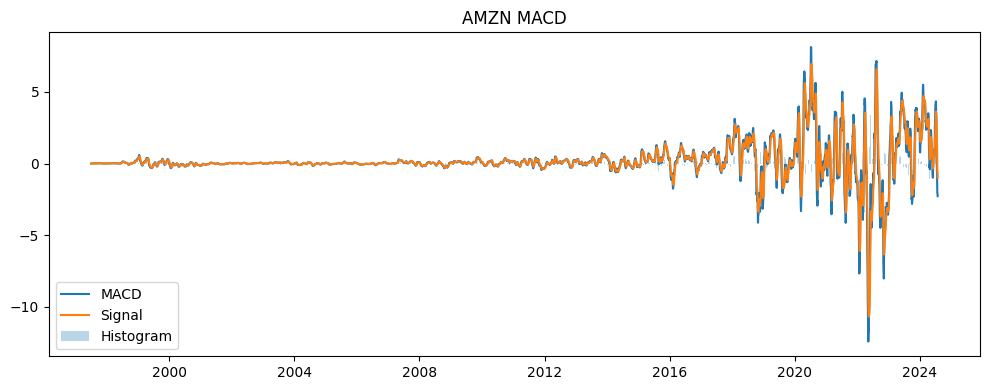

Saved plot: GOOG_macd.png


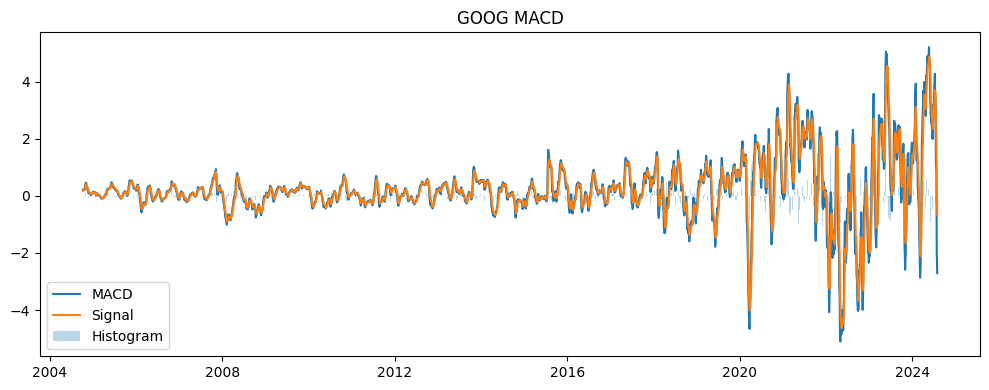

Saved plot: META_macd.png


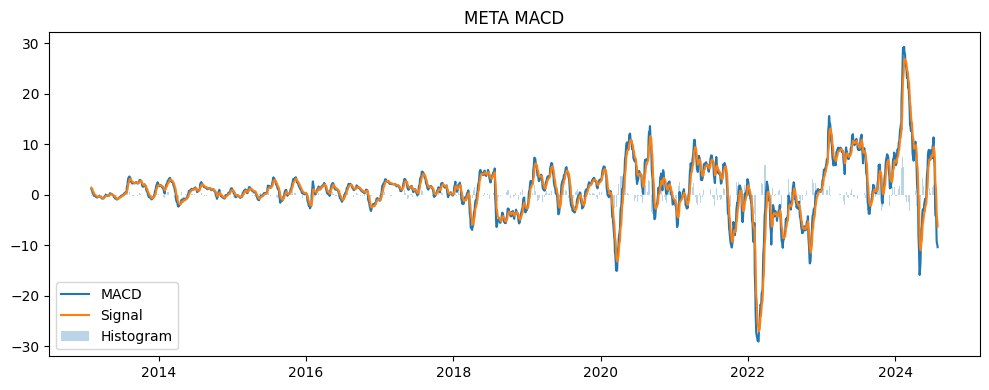

Saved plot: MSFT_macd.png


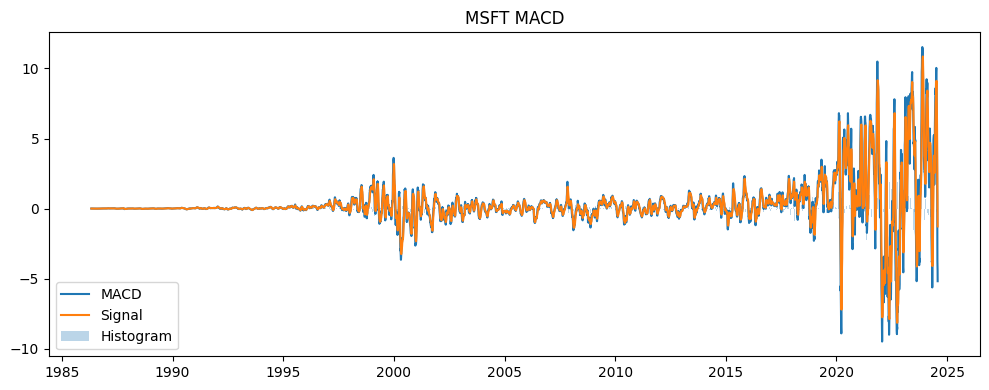

Saved plot: NVDA_macd.png


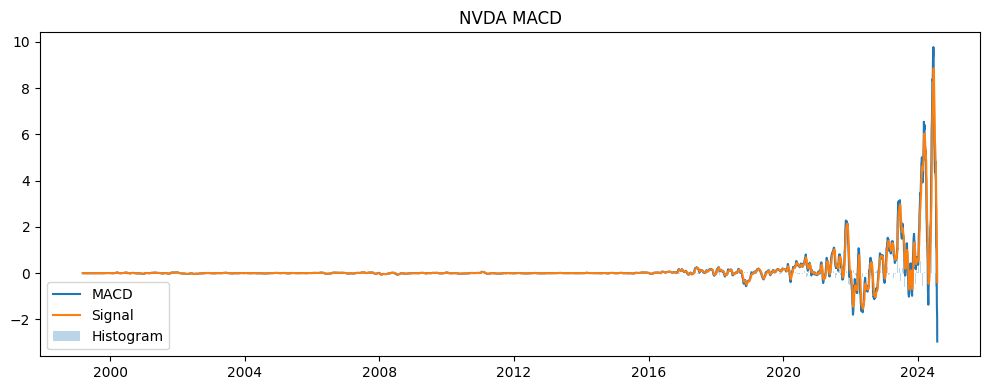

Saved plot: TSLA_macd.png


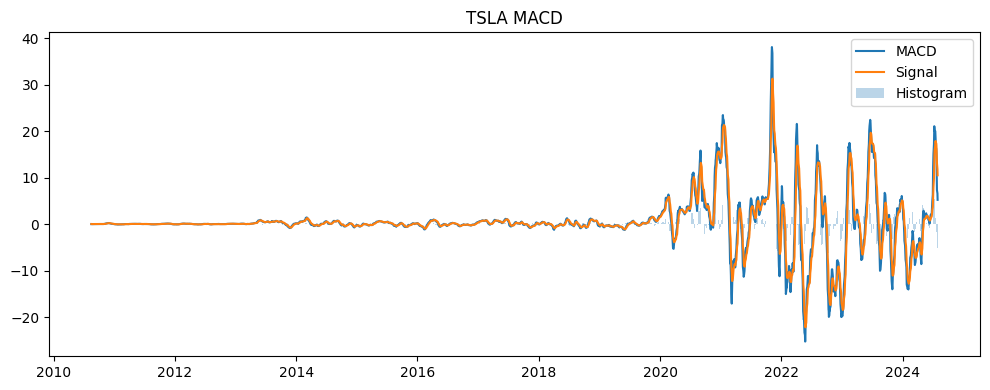

In [78]:
for ticker, df in dfs.items():
    # Plot MACD
    plt.figure(figsize=(10,4))
    plt.plot(df['MACD'], label='MACD')
    plt.plot(df['MACD_Signal'], label='Signal')
    plt.bar(df.index, df['MACD_Hist'], label='Histogram', alpha=0.3)
    plt.title(f"{ticker} MACD")
    plt.legend()
    plt.tight_layout()
    save_and_show_plot(f"{ticker}_macd.png") 

Saved plot: AAPL_volatility.png


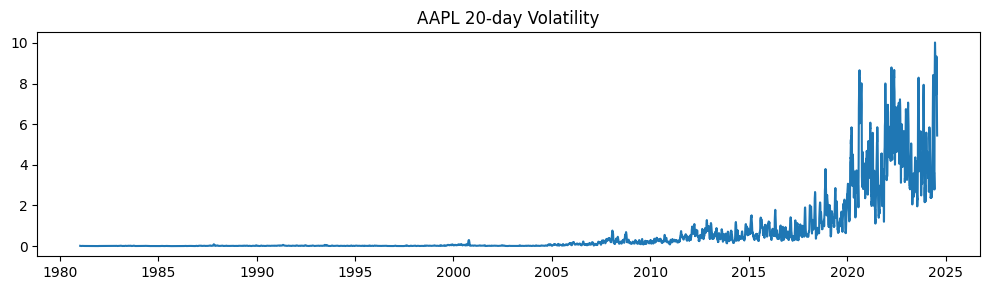

Saved plot: AMZN_volatility.png


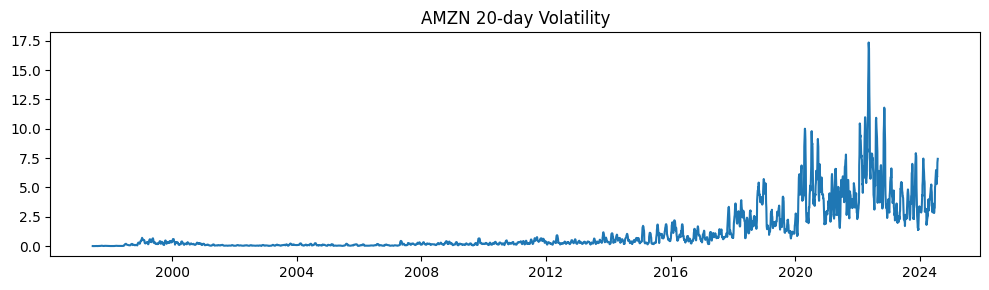

Saved plot: GOOG_volatility.png


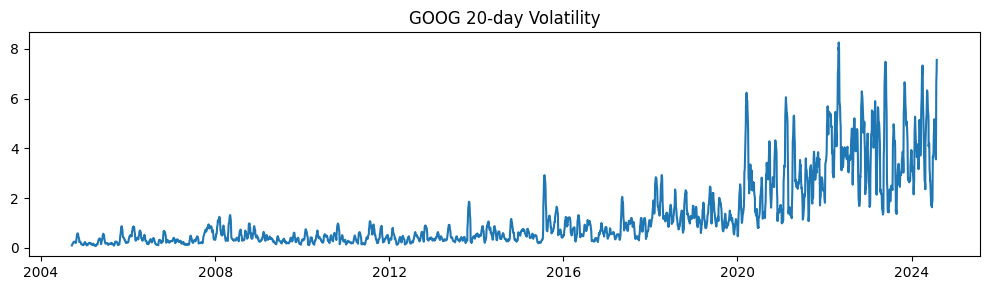

Saved plot: META_volatility.png


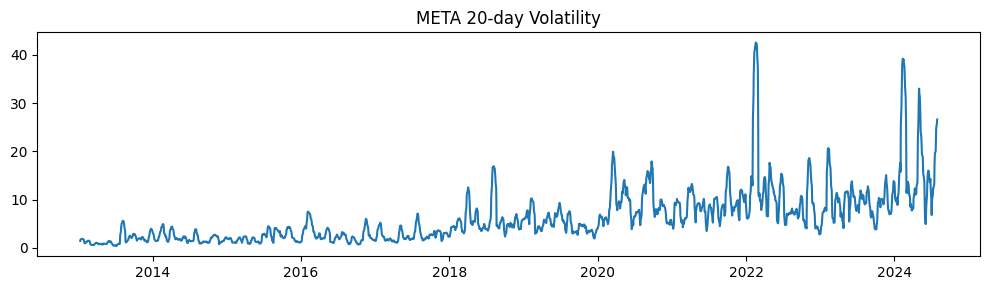

Saved plot: MSFT_volatility.png


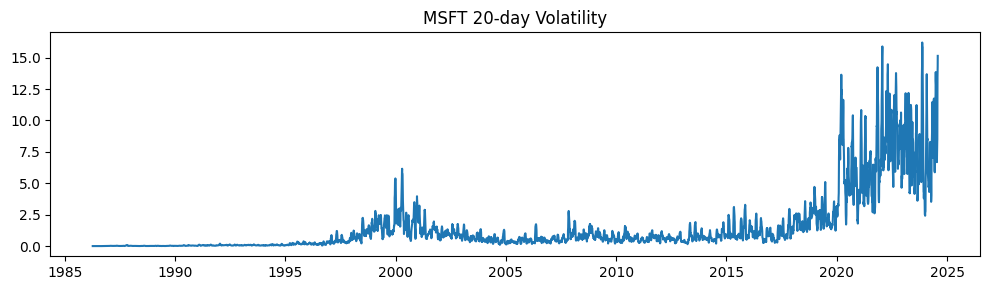

Saved plot: NVDA_volatility.png


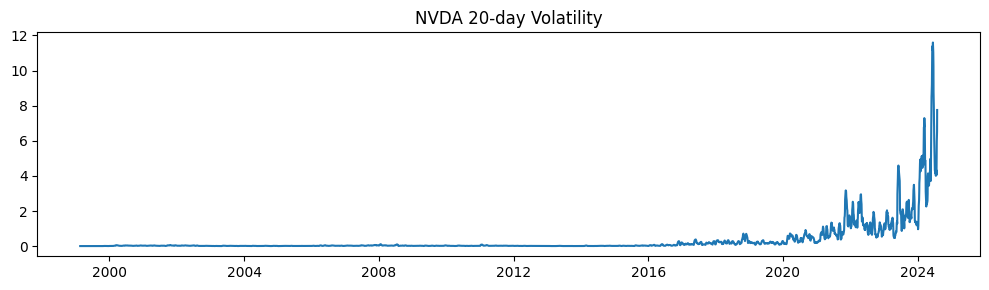

Saved plot: TSLA_volatility.png


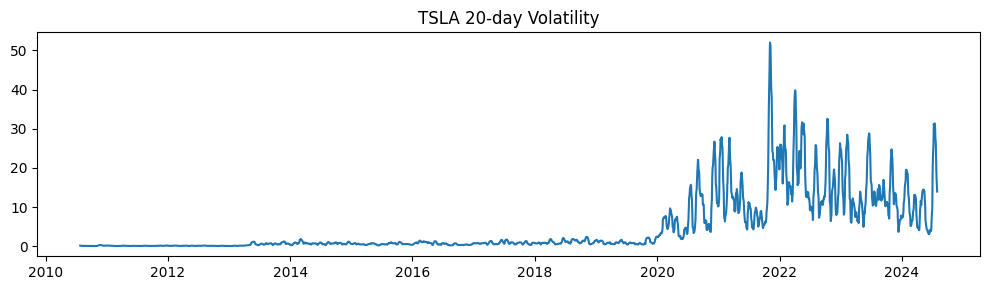

In [79]:
for ticker, df in dfs.items():
    # Plot Volatility
    plt.figure(figsize=(10,3))
    plt.plot(df['Volatility20'], label='Volatility 20')
    plt.title(f"{ticker} 20-day Volatility")
    plt.tight_layout()
    save_and_show_plot(f"{ticker}_volatility.png")  

Saved plot: AAPL_returns.png


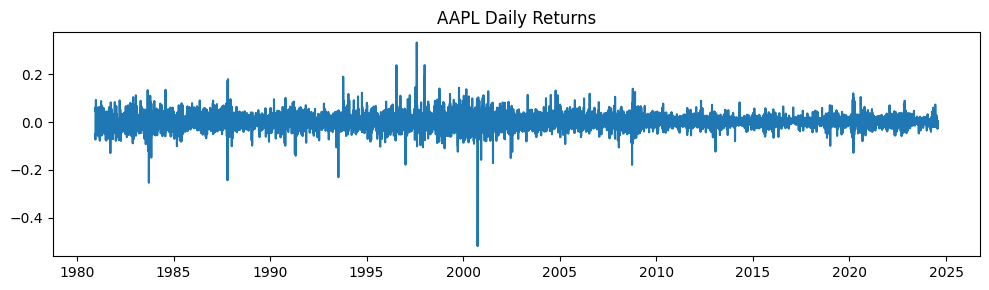

Saved plot: AMZN_returns.png


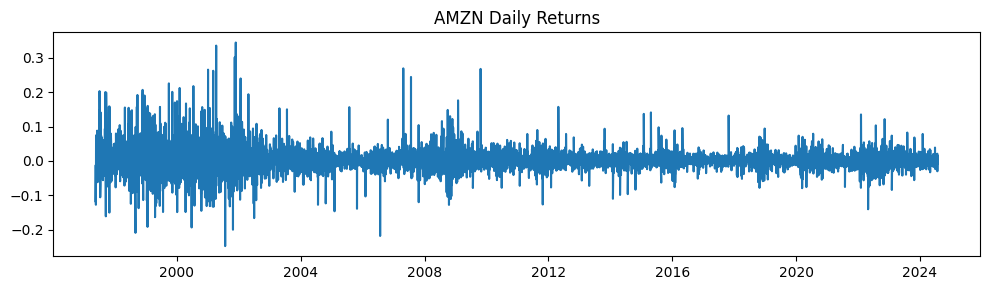

Saved plot: GOOG_returns.png


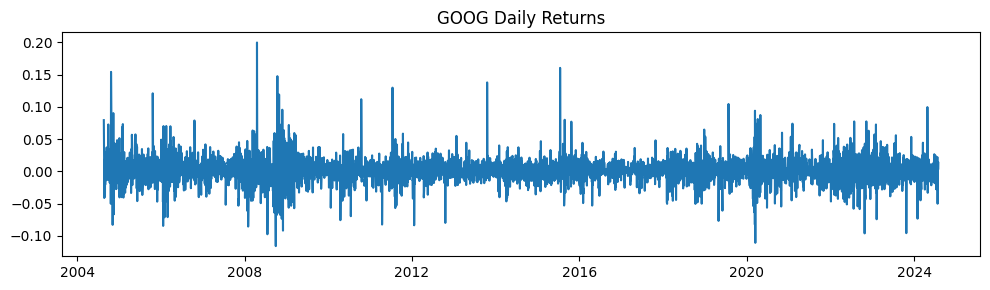

Saved plot: META_returns.png


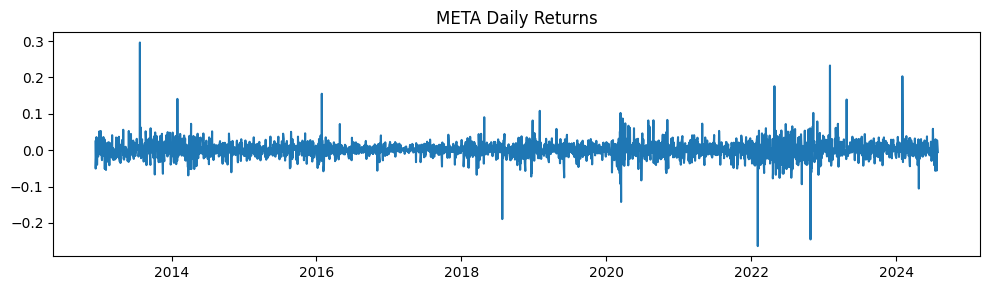

Saved plot: MSFT_returns.png


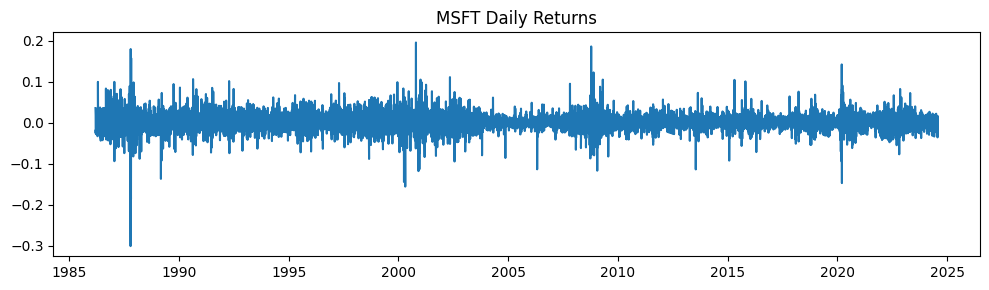

Saved plot: NVDA_returns.png


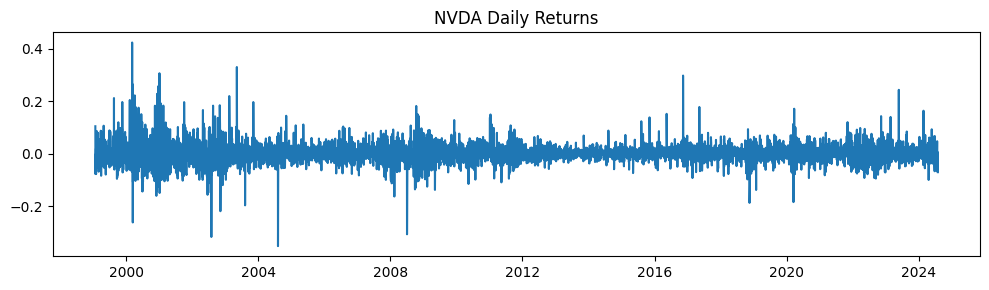

Saved plot: TSLA_returns.png


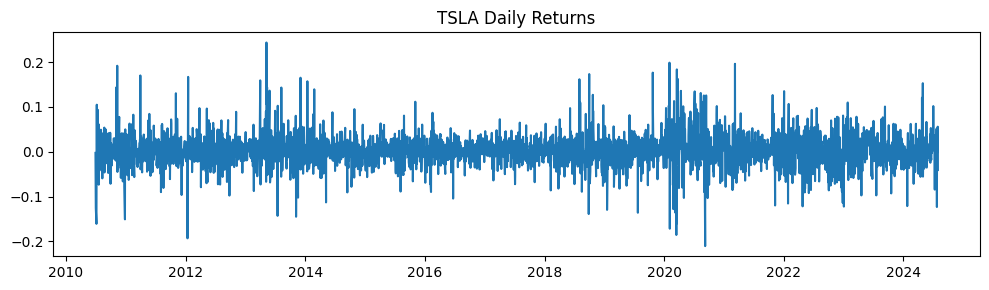

In [80]:
for ticker, df in dfs.items():
    # Plot Returns
    plt.figure(figsize=(10,3))
    plt.plot(df['Daily_Return'], label='Daily Return')
    plt.title(f"{ticker} Daily Returns")
    plt.tight_layout()
    save_and_show_plot(f"{ticker}_returns.png")

Saved plot: AAPL_indicator_correlations.png


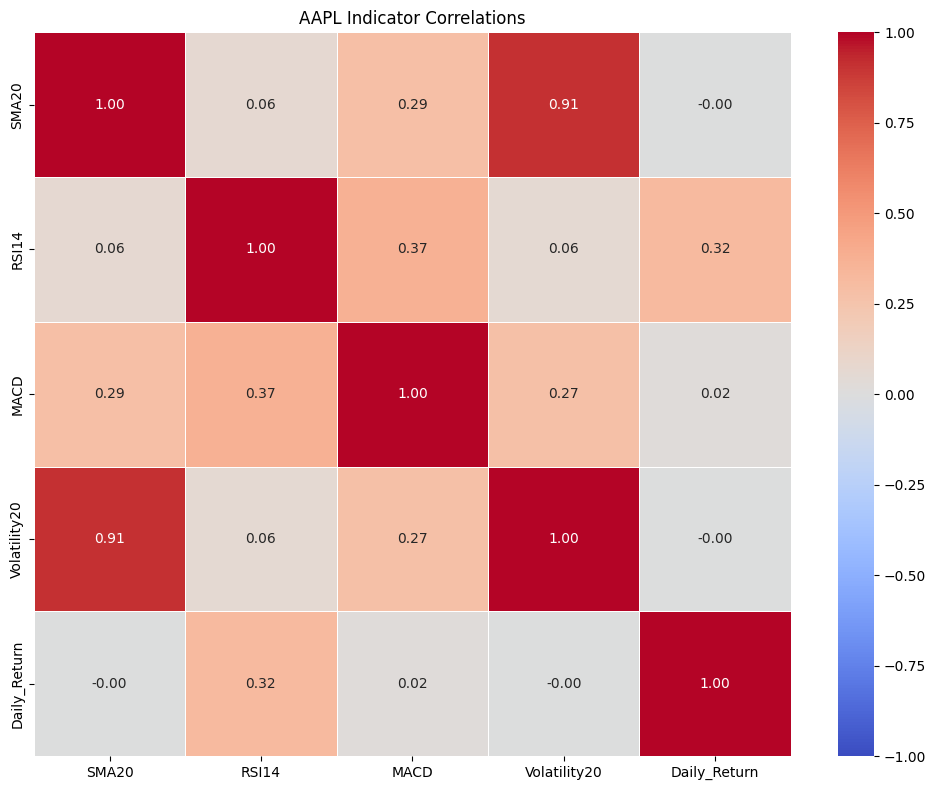

Saved plot: AMZN_indicator_correlations.png


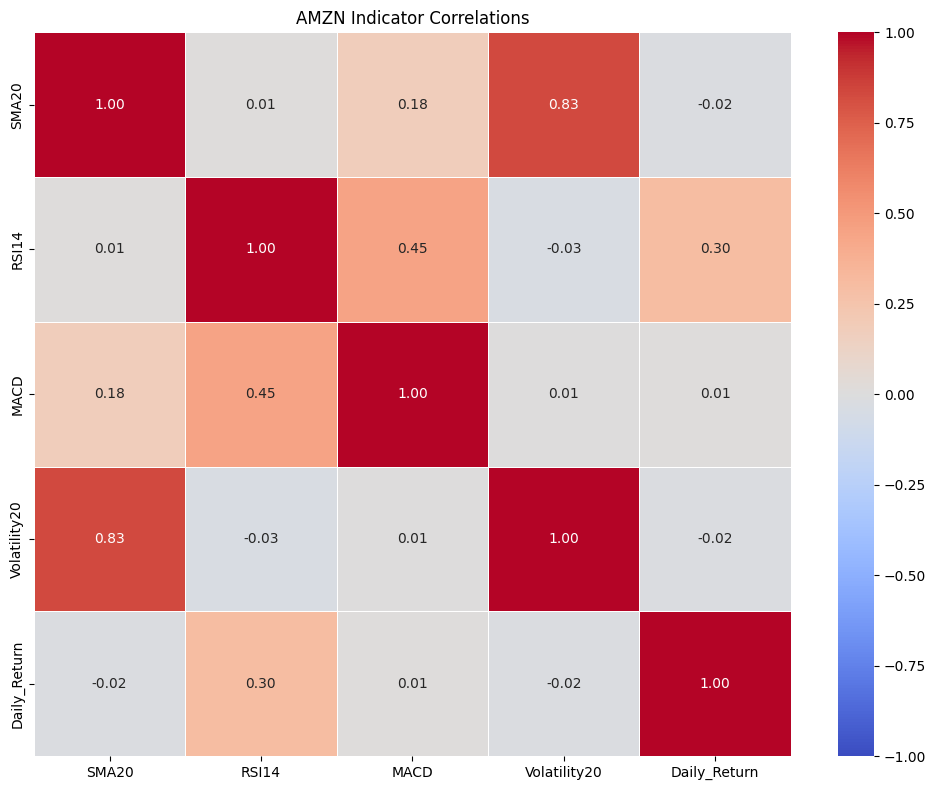

Saved plot: GOOG_indicator_correlations.png


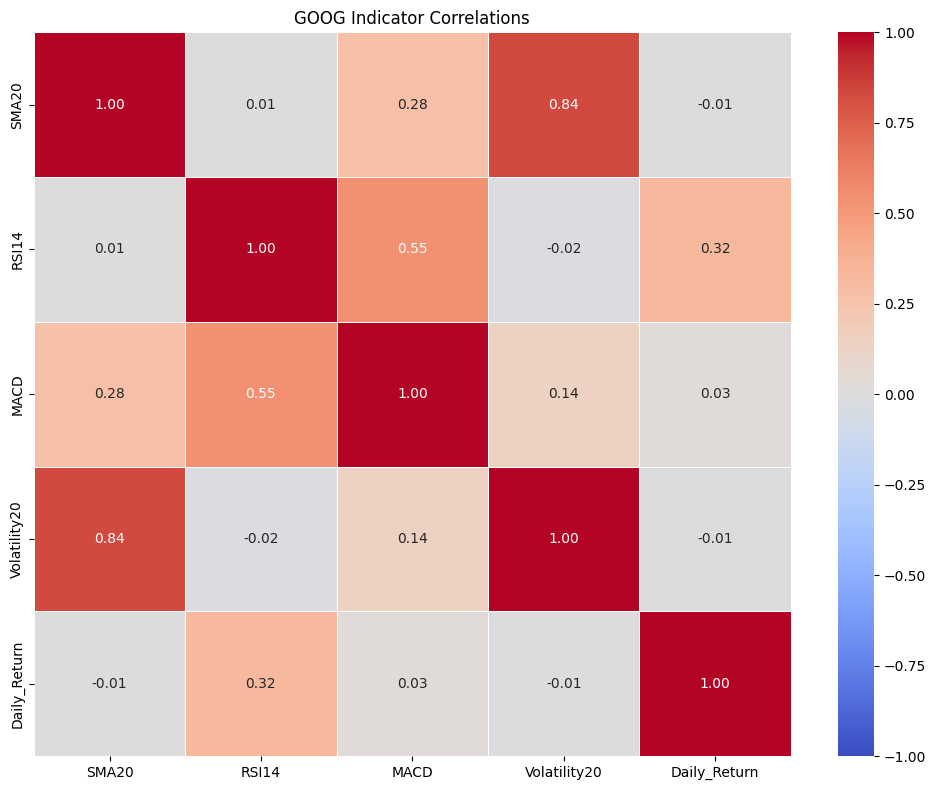

Saved plot: META_indicator_correlations.png


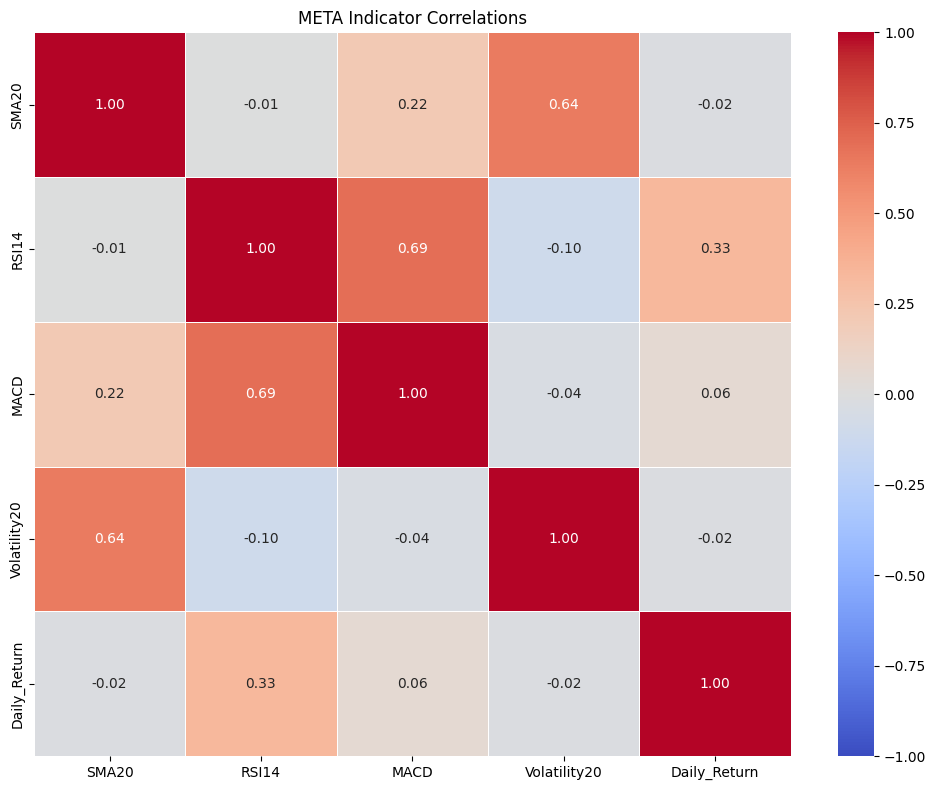

Saved plot: MSFT_indicator_correlations.png


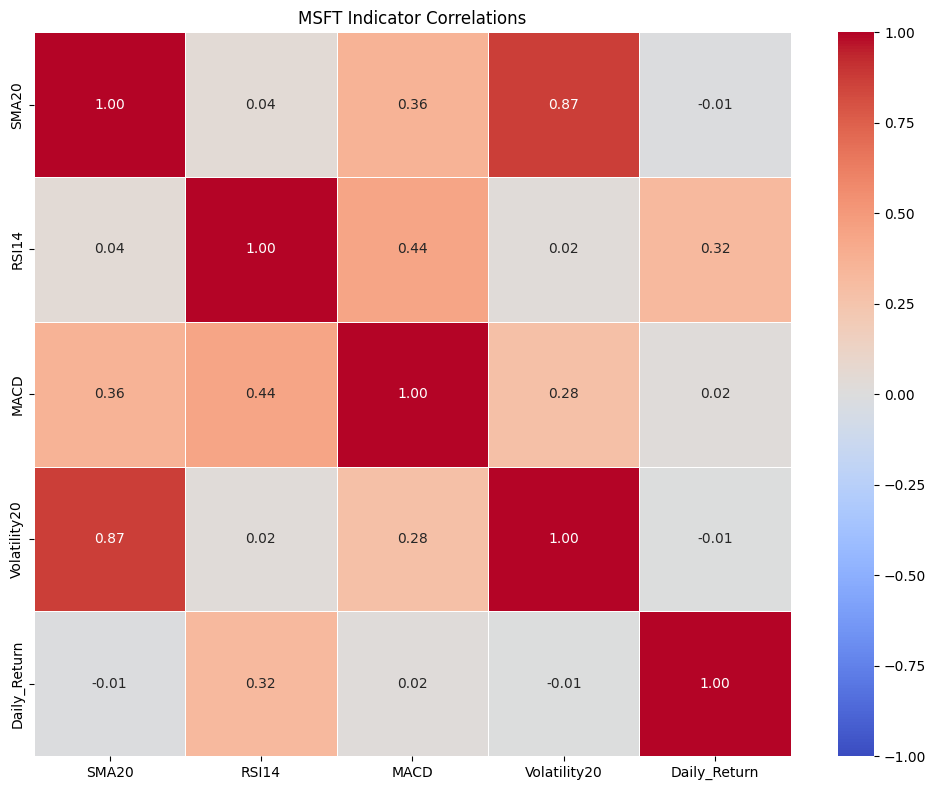

Saved plot: NVDA_indicator_correlations.png


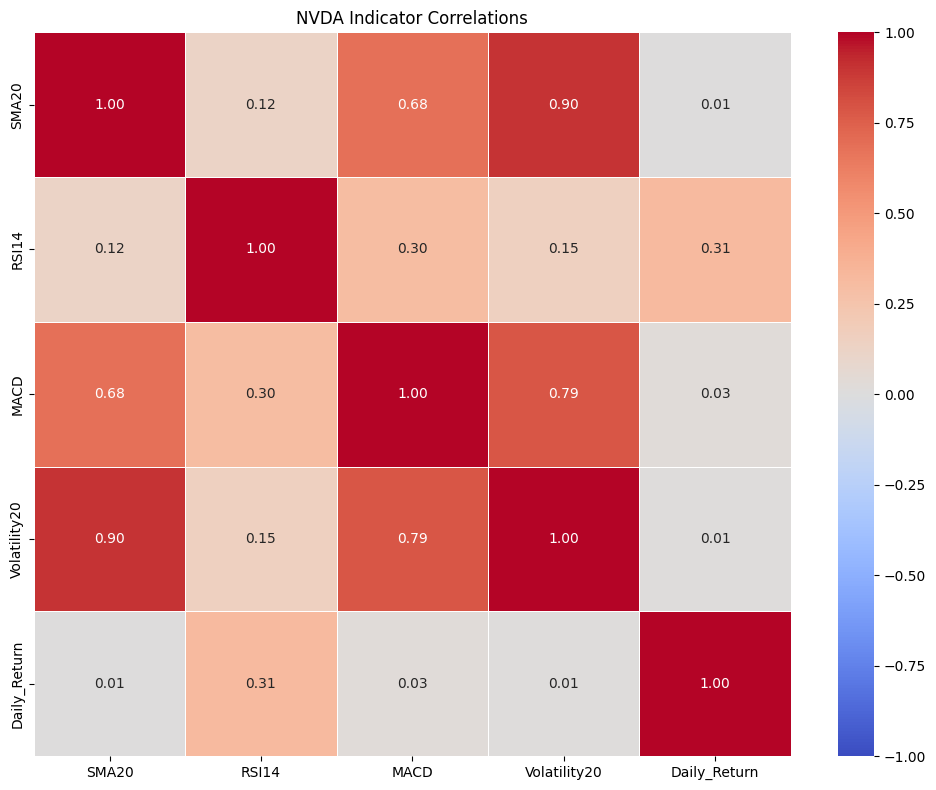

Saved plot: TSLA_indicator_correlations.png


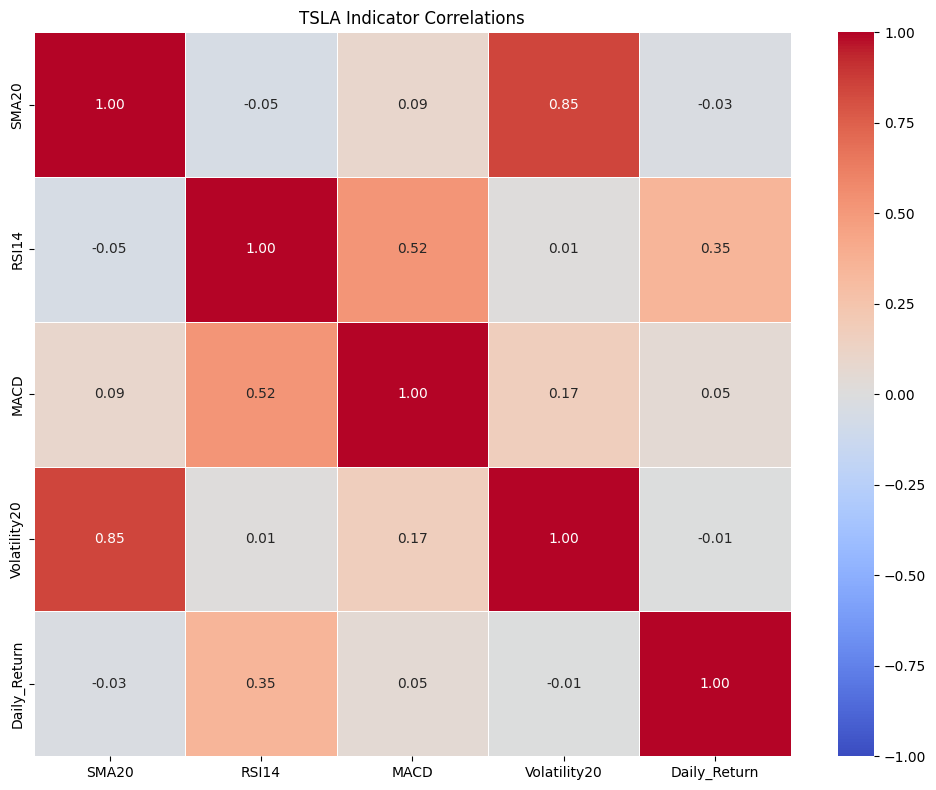

In [82]:
# Correlation analysis between indicators
all_correlations = {}
for ticker, df in dfs.items():
    try:
        # Select relevant columns for correlation
        corr_df = df[['SMA20', 'RSI14', 'MACD', 'Volatility20', 'Daily_Return']].copy()
        
        # Calculate correlations
        corr = corr_df.corr()
        all_correlations[ticker] = corr
        
        # Create and save/show correlation heatmap
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', 
                    vmin=-1, vmax=1, linewidths=0.5)
        plt.title(f"{ticker} Indicator Correlations")
        save_and_show_plot(f"{ticker}_indicator_correlations.png")
        
    except Exception as e:
        print(f"Correlation analysis failed for {ticker}: {str(e)}")